In [1]:
from scipy.integrate import odeint
from scipy import arange
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
### Lotka-Volterra Model Class
class lotkaVolterra:
    ## Must be in same order as dXdt return
    label = ['x', 'y']
    nVar = len(label)

    ## Parameters
    p = {
    'a': 2.0/3,
    'b': 4.0/3,
    'c': 1.0,
    'd': 1.0
    }

    ## Get initial values for the system
    def __init__(self, X0 = [1.0, 1.0]):
        self.name = self.__class__.__name__
        if self.nVar != len(X0):
            print 'ERROR:', self.nVar, 'initial values required for:', self.name
        else: 
            self.X0 = X0

    ## Define the dX/dt for the system
    def dXdt(self, X, t):
        x, y = X

        dxdt = self.p['a']*x - self.p['b']*x*y
        dydt = self.p['c']*x*y - self.p['d']*y

        return dxdt, dydt

In [3]:
## Time interval of the simulations
t = arange(0.0, 50.0, 0.01)
m = lotkaVolterra()

## Solving the diffential equations
sol = odeint(m.dXdt, m.X0, t)

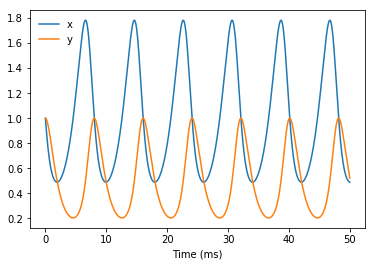

In [4]:
## Plot solution timeseries
fig, ax = plt.subplots()
for i, v in enumerate(m.label):
    figY = plt.plot(t, sol[:,i], label=v)

plt.xlabel('Time (ms)')
plt.legend(frameon=False)
plt.show()

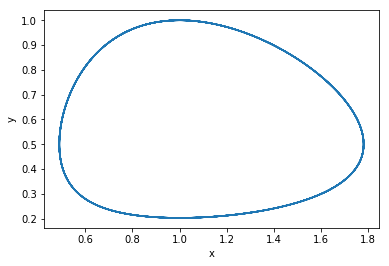

In [5]:
## Phase portrait
fig, ax = plt.subplots()

x, z = sol.T
plt.plot(x, z)

plt.xlabel('x')
plt.ylabel('y')
plt.show()